# Regressions and Neural Networks

<a rel="license" href="https://creativecommons.org/licenses/by-nc-sa/4.0/"><img alt="Creative Commons Licence" style="width=50" src="https://licensebuttons.net/l/by-nc-sa/4.0/88x31.png" title='This work is licensed under a Creative Commons Attribution 4.0 International License.' align="right"/></a>

**Authors**: Dr Matteo Degiacomi (matteo.t.degiacomi@durham.ac.uk) and Dr Antonia Mey (antonia.mey@ed.ac.uk)

Content is partially adapted from [Software Carpentry Course on Neural Networks](https://carpentries-incubator.github.io/machine-learning-novice-sklearn/06-neural-networks/index.html)

**Jupyter cheat sheet**:
- to run the currently highlighted cell, hold <kbd>&#x21E7; Shift</kbd> and press <kbd>&#x23ce; Enter</kbd>;
- to get help for a specific function, place the cursor within the function's brackets, hold <kbd>&#x21E7; Shift</kbd>, and press <kbd>&#x21E5; Tab</kbd>;

## 1. Introduction

### 1.1. Regressions, what for?

Features extracted from your simulation may be correlated. They may also correlate with a quantity you wish to estimate, but its estimation is very computationally expensive and so inferring it would be desirable. Fitting a regression model on your data can overall be useful for:
- understanding trends in data,
- predicting the resultant value of a variable associated with a specific combination on features.

Scikit-learn features many different methods to fit models to data (see [here](https://scikit-learn.org/stable/supervised_learning.html])). You might probably be already familiar with linear and non-linear regression methods. This notebook will cover something quite different: neural networks.

### 1.2. Neural Networks and Interpretability

In the course slides, we have seen how a single neuron (perceptron) operates. Unfortunately, a single neuron cannot be used to study a non-linearly separable function. For that, we need to use multiple perceptrons, and typically multiple layers of perceptrons (MLP). They are formed of networks of artificial neurons which each take one or more inputs and typically have a single output. The neurons are connected together in large networks typically of 10s to 1000s of neurons. Generally, networks are connected in layers with an input layer, middle or hidden layer(s), and finally an output layer.

The advantage of MLPs, is that they can identify patterns, and fit them with a model, in high dimensional and complex datasets. The disadvantage, however, is that their **interpretability is low**: it is usually very difficult to tell how the neural network is making a prediction. Therefore, MLPs are better suited in tasks where predictions are needed, while no specific insight into how the prediction is actually made is necessary.

## 2. Multi-layer Perceptrons (MLP)

Multi-layer perceptrons (MLPs) can both be used for classification and regression tasks. In this tutorial we will focus on the latter, using the [MLPRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html#sklearn.neural_network.MLPRegressor) class in scikit-learn.

### 2.1. MLP vs Linear Distribution

Let's start by creating some simple linear data. We will use the `make_regression` method of scikit-learn to generate some noisy data. In this context, a simple 2-dimensional scatter plot can be seen as a single feature associated with a predicted value.

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=1.3)
sns.set_style('ticks')
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

X, y = make_regression(n_features=1, n_samples=500, noise=10)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.9)

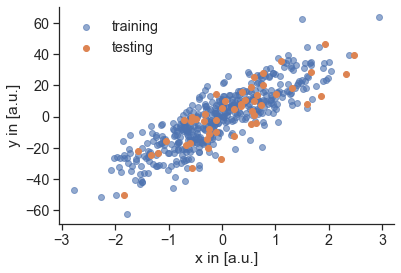

In [20]:
plt.scatter(X_train,y_train, alpha=0.6, label = 'training')
plt.scatter(X_test,y_test, label = 'testing')

sns.despine()
plt.xlabel('x in [a.u.]')
plt.ylabel('y in [a.u.]')
plt.legend(frameon=False)

We will now train an MLP with the data we have just generated. Then, we will evaluate the performance of the trained MLP against the test data, reporting the coefficient of determination (ranging from 0 to 1, where 1 means perfect prediction).

In [21]:
from sklearn.neural_network import MLPRegressor

regr = MLPRegressor(max_iter=200).fit(X_train, y_train)
print(f'Coefficient of determination: {regr.score(X_test, y_test):.4f}')

Coefficient of determination: 0.6805


/Users/toni_brain/miniconda3/envs/MDA_ML_Workshop/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


You may have noticed that the execution of the cell above throws a warning: the optimisation has not converged yet. The training of an MLP is iterative, and continues until a halting condition (maximum number of iteration, `max_iter`, by default equal to 200) is reached. At every step, the loss function (the error between data predicted by the MLP and the real training data) is evaluated. This error tells us that at the last optimisation step the loss function was still decreasing. Let's take a look at that (it is common place to plot the loss function on a logscale):

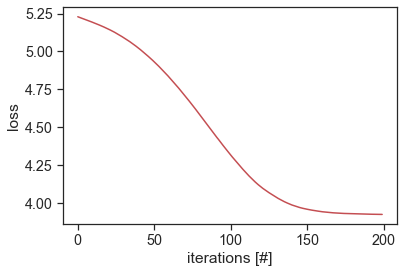

In [22]:
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
plt.plot(np.log(regr.loss_curve_), color="r")
ax.set_xlabel("iterations [#]")
ax.set_ylabel("loss");

<div class="alert alert-success">
<b>Task 1.</b> What happens to the coefficient of determination if you increase the <code>max_iter</code>? How does the loss function evolution look like?</div>

<details>
<summary> <mark> Answer 1</mark> </summary>
The coefficient of determination increases, and the loss function becomes increasingly flat.</details>

We now have a trained MLP! Let's compare the predictions it makes with the regression data provided as input.

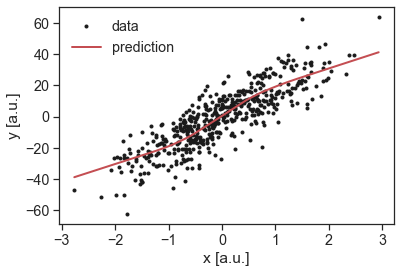

In [23]:
x_pred = np.array([np.linspace(np.min(X), np.max(X), len(X))]).T
y_pred = regr.predict(x_pred)

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel("x [a.u.]")
ax.set_ylabel("y [a.u.]")
ax.plot(X, y, "k.", lw=0, label="data")
ax.plot(x_pred, y_pred, "r-", lw=2, label="prediction")
plt.legend(frameon=False);

<div class="alert alert-success">
<b>Task 2.</b> What happens to model when you alter the <code>max_iter</code> in the training phase of the MLP?

<details>
<summary> <mark> Answer 2</mark> </summary>
The model fits the data increasingly better</details>

<div class="alert alert-block alert-info"><b>Multiple runs, different results?</b>
    
Have you noticed that, every time you train the MLP on the same data, you get slightly different performances? This is because the training of a neural network is stochastic. The weights of its synapses are randomly initialised, the optimizer used to updated their weight exploit local gradient estimates to overcome local minima (e.g. stochastic gradient descent, SGD), and the order in which the different features are fed to the neural network for training is also usually randomised. Often the problems addressed with neural networks feature many local minima with comparable performance, the neural network parameters may converge to one of these minima or another.
</div>

### 2.2 MLP vs Higher Order Polynomial

Instead of a linear model, let's now try to fit somethig a bit "wobblier": a third order polynomial.

In [24]:
# generate polynomial
def fct(x, a, b, c, d):
    return d*x**3 + c*x**2 - b*x + a

x = np.linspace(-10, 10, 200)
y = fct(x, 1, 2, 1, 0.5) + np.random.normal(0, 100, len(x))

# make training and test set
X = np.array([x]).T
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.9)

Like before, let's fit the data with an MLP and plot the data along with the MLP predictions.

coefficient of determination: 0.5051


/Users/toni_brain/miniconda3/envs/MDA_ML_Workshop/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


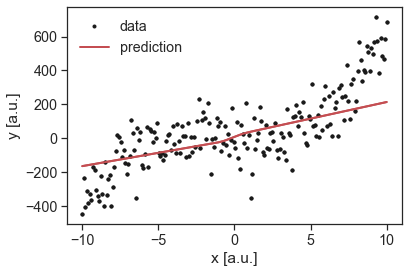

In [27]:
# train MLP
regr = MLPRegressor(hidden_layer_sizes=(100,), max_iter=500).fit(X_train, y_train)
print(f'coefficient of determination: {regr.score(X_test, y_test):.4f}')

# predict values with trained MLP
x_pred = np.array([np.linspace(np.min(X), np.max(X), len(X))]).T
y_pred = regr.predict(x_pred)

#plot
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel("x [a.u.]")
ax.set_ylabel("y [a.u.]")
ax.plot(X, y, "k.", lw=0)
ax.plot(x_pred, y_pred, "r-", lw=2)
ax.plot(X, y, "k.", lw=0, label="data")
ax.plot(x_pred, y_pred, "r-", lw=2, label="prediction")
plt.legend(frameon=False);

The model seems a bit so-so: the success rate is poor, and the red line, showing the prediction made by the neural network for different values of x, does not seem to follow the data very well. Again, it does not seem we have reached convergence, so we can increase `max_iter`. There is something else we can do, tough.

You may have noticed that in the cell above, the MLPRegressor call features a new optional parameter: `hidden_layer_sizes`. This is a tuple determining the number of hidden layers, and how many neurons each of them contains. For instance, `(100, 50)` means that the MLP will have two layers, the first with 100 neurons and the second with 50.

<div class="alert alert-success">
<b>Task 3.</b> What happens to the success rate and the resulting model, when altering the <code>hidden_layer_sizes</code>? Try to change the number of neurons and the number of layers.</div>

<details>
<summary> <mark> Answer 3</mark> </summary>
Both increasing the number of neurons and the depth of the network, leads to a model that follows the data distribution more closely.</details>

We will now repeat what we did above, but this time we will produce a very small dataset, comprised of only 50 points, 10 used for training, and the rest for testing.

In [28]:
#generate a small dataset (only 50 points), and make a training and test set out of them
x = np.linspace(-10, 10, 50)
y = fct(x, 1, 2, 1, 0.5) + np.random.normal(0, 100, len(x))
X = np.array([x]).T
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.2)

coefficient of determination: 0.5012


/Users/toni_brain/miniconda3/envs/MDA_ML_Workshop/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


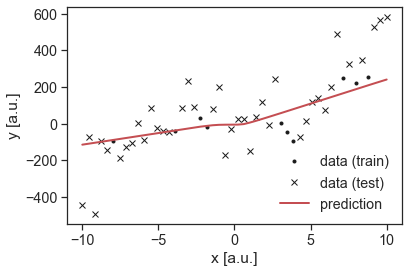

In [31]:
# train MLP
regr = MLPRegressor(hidden_layer_sizes=(200,), max_iter=1000, random_state=1).fit(X_train, y_train)
print(f'coefficient of determination: {regr.score(X_test, y_test):.4f}')

# predict values with trained MLP
x_pred = np.array([np.linspace(np.min(X), np.max(X), len(X))]).T
y_pred = regr.predict(x_pred)

#plot
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel("x [a.u.]")
ax.set_ylabel("y [a.u.]")
ax.plot(X_train, y_train, "k.", lw=0, label="data (train)")
ax.plot(X_test, y_test, "kx", lw=0, label="data (test)")
ax.plot(x_pred, y_pred, "r-", lw=2, label="prediction")
plt.legend(frameon=False);

<div class="alert alert-success">
<b>Task 4.</b> What happens to the coefficient of determination when you add a second layer to the MLP? Why?</div>

<details>
<summary> <mark> Answer 4</mark> </summary>
There is no point in making the model too complicated. In fact, this may even be counterproductive: the neural network may get extremely good at following the training data, but its performance against the test set would be poor. This is what we call <b>overfitting</b>.</details>

In [ ]:
# 2.3. Regularization
#from sklearn.preprocessing import StandardScaler  
#scaler = StandardScaler()  
#scaler.fit(X_train)  
#X_train = scaler.transform(X_train)  
#X_test = scaler.transform(X_test)

### 2.3. MLP vs High Dimensional Data

Up to now, the data we have been analysing could have been easily fit with any other more common method (e.g. with simple linear regressions). Data can be highly multidimensional though, and in this case MLP can be helpful. Let's generate a collection of 100-dimensional datapoints and fit a model onto them. Of course we will not be able to plot them, but we will be able to see how well the MLP peforms in the test phase.

In [33]:
X, y = make_regression(n_samples=500, noise=50, n_features=100)
X_train, X_test, y_train, y_test = train_test_split(X, y)
print(X.shape)

(500, 100)


Let's now train an MLP and report on its performance during a test phase.

In [34]:
regr = MLPRegressor(max_iter=500).fit(X_train, y_train)
regr.score(X_test, y_test)

/Users/toni_brain/miniconda3/envs/MDA_ML_Workshop/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


0.7429083492155121

The MLP is doing a pretty nice job in predicting data from the test set! Of course, MLP is not the only method to fit the data, there exist many other methods, for instance `sklearn.linear_model.LinearRegression`, which fits a linear regression model.

<div class="alert alert-success">
<b>Task 5:</b> <class>LinearRegression</class> uses essentially the same syntax as MPLRegression. Give it a try, does it work well? How do the two methods deal with noise?</div>

<details>
<summary> <mark> Answer 5</mark> </summary>
This is how you can train a linear regression model with scikit-learn

```python
from sklearn.linear_model import LinearRegression
regr = LinearRegression().fit(X_train, y_train)
```

Turns out, it does a much better job than MLP! This is because the data to be fitted does indeed respect the distribution of a linear regression model. MLP is useful if you do not know (nor care about) the specific model you want to fit.    
</details>

## 3. Deep Learning

Deep learning usually refers to newer neural network architectures which use a special type of network known as a convolutional network. Typically, these have many layers and thousands of neurons. They are very good at tasks such as image recognition but take a long time to train and run. They are often used with GPU (Graphical Processing Units) which are good at executing multiple operations simultaneously. It is very common to use cloud computing or HPC systems with multiple GPUs attached.

Scikit learn is not really setup for Deep Learning. We will have to rely on other libraries. Common choices include Google’s [TensorFlow](https://www.tensorflow.org/) or [PyTorch](https://pytorch.org/). There is however an interface layer between sklearn and tensorflow called skflow. A short example of doing this can be found at https://www.kdnuggets.com/2016/02/scikit-flow-easy-deep-learning-tensorflow-scikit-learn.html.

## 3. Conclusion

<div class="alert alert-info">
<b>Key points:</b>
    
- multi-layer perceptrons are neural networks that can be used for classification and regression,
- ensuring neural network training continues until convergence is usually helpful,
- neural networks can easily learn from hundreds of features,
- neural networks can overfit,
- deep learning is a very rich research area, and often requires designing custom neural networks architectures and training methods for which scikit-learn is ill-suited.
- <i>use the right algorithm for the right problem: neural networks are trendy, but not everything needs one!</i>
</div>